In [72]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from sklearn.svm import SVC


In [141]:
os.listdir()

['.ipynb_checkpoints',
 'ex6data1.mat',
 'ex6data2.mat',
 'ex6data3.mat',
 'Untitled.ipynb']

In [74]:
data = loadmat('ex6data1.mat')

In [75]:
type(data)

dict

In [76]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [77]:
X = data['X']
y = data['y']

In [78]:
X.shape

(51, 2)

In [79]:
pos = (y==1).ravel()
neg = (y==0).ravel()

In [101]:
def plotdata(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='.', linewidths=1)

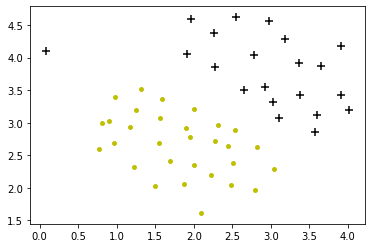

In [102]:
plotdata(X,y)

In [130]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotdata(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

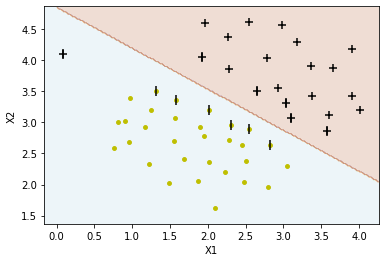

Number of support vectors:  12


In [131]:
clf = SVC(C=1,kernel='linear')
clf.fit(X,y.ravel())
plot_svc(clf,X,y)

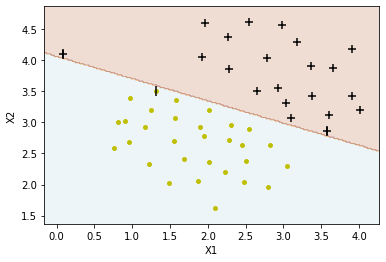

Number of support vectors:  3


In [132]:
clf = SVC(C=100,kernel='linear')
clf.fit(X,y.ravel())
plot_svc(clf,X,y)

# Gussian kernel

In [133]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [134]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [135]:
data2 = loadmat('ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [136]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


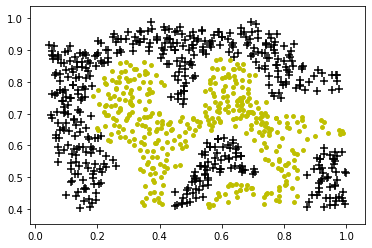

In [137]:
plotdata(X2, y2)


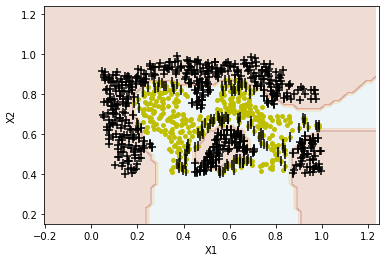

Number of support vectors:  254


In [138]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

In [142]:
data3 = loadmat('ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [143]:

y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


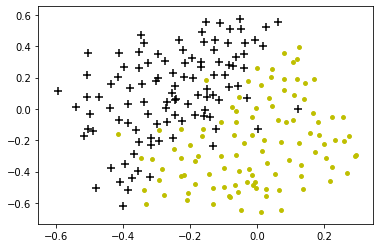

In [144]:
plotdata(X3, y3)


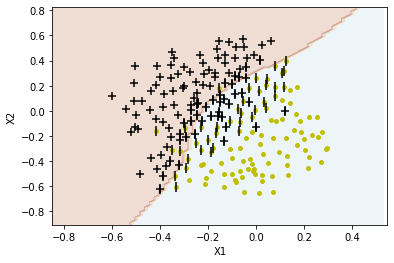

Number of support vectors:  78


In [148]:
clf3 = SVC(C=1, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)